Epoch 1, Loss: 0.6123401522636414
Epoch 2, Loss: 0.3823278248310089
Epoch 3, Loss: 0.22872459888458252
Epoch 4, Loss: 0.3644448518753052
Epoch 5, Loss: 0.3523516058921814
Epoch 6, Loss: 0.35985368490219116
Epoch 7, Loss: 0.3444940149784088
Epoch 8, Loss: 0.21277180314064026
Epoch 9, Loss: 0.1780516803264618
Epoch 10, Loss: 0.36229783296585083
Epoch 11, Loss: 0.18779820203781128
Epoch 12, Loss: 0.3509841859340668
Epoch 13, Loss: 0.20941750705242157
Epoch 14, Loss: 0.15452829003334045
Epoch 15, Loss: 0.19470781087875366
Epoch 16, Loss: 0.19062583148479462
Epoch 17, Loss: 0.10117536783218384
Epoch 18, Loss: 0.18262094259262085
Epoch 19, Loss: 0.16038337349891663
Epoch 20, Loss: 0.157331645488739
Epoch 21, Loss: 0.17737367749214172
Epoch 22, Loss: 0.04642334207892418
Epoch 23, Loss: 0.25836899876594543
Epoch 24, Loss: 0.06917015463113785
Epoch 25, Loss: 0.08777817338705063
Epoch 26, Loss: 0.13940952718257904
Epoch 27, Loss: 0.07308443635702133
Epoch 28, Loss: 0.08953113853931427
Epoch 29, 

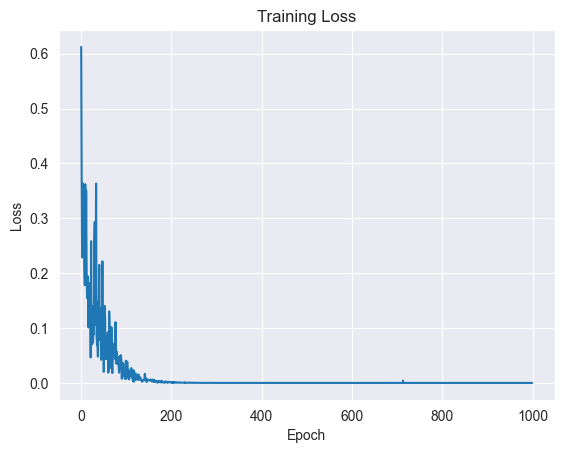

Accuracy: 0.8825910931174089, F1 Score: 0.8825910931174089, ROC AUC: 0.8827213114754098


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv('Resources/Data/Encoded_Resampled_HR_Analytics.csv')
X = df.drop('Attrition', axis=1).values
y = df['Attrition'].values

# Data Preprocessing
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

# Create DataLoader
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=32, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=32, shuffle=False)

# Define the Neural Network model
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(34, 50)
        self.fc2 = nn.Linear(50, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model, loss, and optimizer
model = NN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
train_loss = []
for epoch in range(1000):
    for batch in train_loader:
        X_batch, y_batch = batch
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
    train_loss.append(loss.item())
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

# Evaluate the model
model.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for batch in test_loader:
        X_batch, y_batch = batch
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.tolist())
        y_true.extend(y_batch.tolist())

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)

# Visualize the training loss
plt.plot(train_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

print(f"Accuracy: {accuracy}, F1 Score: {f1}, ROC AUC: {roc_auc}")

Model Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 64]           2,240
            Linear-2               [-1, 1, 128]           8,320
            Linear-3                [-1, 1, 64]           8,256
            Linear-4                 [-1, 1, 2]             130
Total params: 18,946
Trainable params: 18,946
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.07
Estimated Total Size (MB): 0.07
----------------------------------------------------------------
Epoch 1, Loss: 0.4128456711769104
Epoch 2, Loss: 0.29306554794311523
Epoch 3, Loss: 0.24240204691886902
Epoch 4, Loss: 0.27600303292274475
Epoch 5, Loss: 0.31596845388412476
Epoch 6, Loss: 0.1791633665561676
Epoch 7, Loss: 0.06017123535275459
Epoch 8, Loss: 0.12865275144577026
Epoch 9

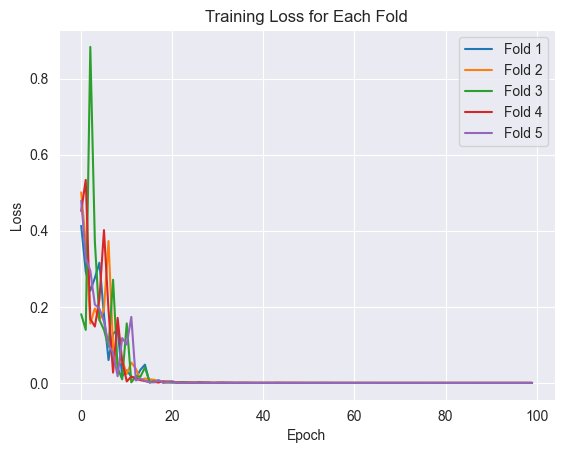

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from torchsummary import summary

# Load the dataset
df = pd.read_csv('Resources/Data/Encoded_Resampled_HR_Analytics.csv')
X = df.drop('Attrition', axis=1).values
y = df['Attrition'].values

# Data Preprocessing
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define the Neural Network model with more layers
class EnhancedNN(nn.Module):
    def __init__(self):
        super(EnhancedNN, self).__init__()
        self.fc1 = nn.Linear(34, 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Display model summary
model = EnhancedNN()
print("Model Summary:")
summary(model, input_size=(1, 34))

# Initialize K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies, fold_f1s, fold_roc_aucs = [], [], []

# To store training loss for visualization
all_train_loss = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train)
    y_train_tensor = torch.LongTensor(y_train)
    X_test_tensor = torch.FloatTensor(X_test)
    y_test_tensor = torch.LongTensor(y_test)

    # Create DataLoader
    train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=32, shuffle=True)
    test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=32, shuffle=False)

    # Initialize the model, loss, and optimizer
    model = EnhancedNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training the model
    train_loss = []
    for epoch in range(100):
        for batch in train_loader:
            X_batch, y_batch = batch
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
        train_loss.append(loss.item())
        print(f"Epoch {epoch+1}, Loss: {loss.item()}")

    # Add to overall training loss for visualization
    all_train_loss.append(train_loss)

    # Evaluate the model
    model.eval()
    y_pred = []
    y_true = []
    with torch.no_grad():
        for batch in test_loader:
            X_batch, y_batch = batch
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            y_pred.extend(predicted.tolist())
            y_true.extend(y_batch.tolist())

    # Calculate metrics for this fold
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)

    fold_accuracies.append(accuracy)
    fold_f1s.append(f1)
    fold_roc_aucs.append(roc_auc)

# Average metrics over all folds
print(f"Average Accuracy: {np.mean(fold_accuracies)}, Average F1 Score: {np.mean(fold_f1s)}, Average ROC AUC: {np.mean(fold_roc_aucs)}")

# Visualize the training loss
for i, train_loss in enumerate(all_train_loss):
    plt.plot(train_loss, label=f"Fold {i+1}")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss for Each Fold')
plt.legend()
plt.show()

Model Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 64]           2,240
           Dropout-2                [-1, 1, 64]               0
            Linear-3               [-1, 1, 128]           8,320
           Dropout-4               [-1, 1, 128]               0
            Linear-5               [-1, 1, 256]          33,024
            Linear-6               [-1, 1, 128]          32,896
            Linear-7                [-1, 1, 64]           8,256
            Linear-8                 [-1, 1, 2]             130
Total params: 84,866
Trainable params: 84,866
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.32
Estimated Total Size (MB): 0.33
----------------------------------------------------------------
Epoch 1, Loss: 0.315655648708

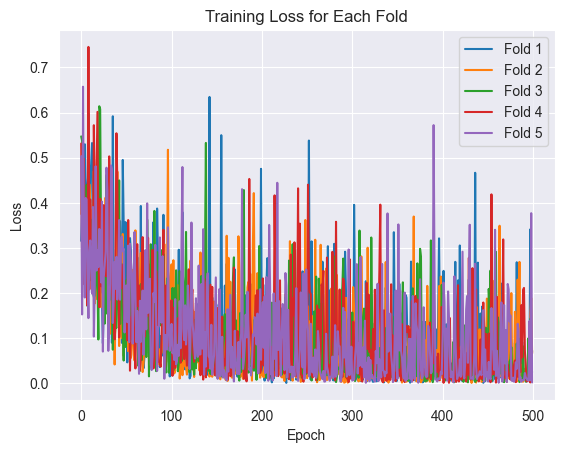

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from torchsummary import summary

# Load the dataset
df = pd.read_csv('Resources/Data/Encoded_Resampled_HR_Analytics.csv')
X = df.drop('Attrition', axis=1).values
y = df['Attrition'].values

# Data Preprocessing
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define the Neural Network model with more layers
class EnhancedNN(nn.Module):
    def __init__(self):
        super(EnhancedNN, self).__init__()
        self.fc1 = nn.Linear(34, 64)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(64, 128)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(128, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 64)
        self.fc6 = nn.Linear(64, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = self.fc6(x)
        return x

# Display model summary
model = EnhancedNN()
print("Model Summary:")
summary(model, input_size=(1, 34))

# Initialize K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies, fold_f1s, fold_roc_aucs = [], [], []

# To store training loss for visualization
all_train_loss = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train)
    y_train_tensor = torch.LongTensor(y_train)
    X_test_tensor = torch.FloatTensor(X_test)
    y_test_tensor = torch.LongTensor(y_test)

    # Create DataLoader
    train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=32, shuffle=True)
    test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=32, shuffle=False)

    # Initialize the model, loss, and optimizer
    model = EnhancedNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training the model
    train_loss = []
    for epoch in range(500):
        for batch in train_loader:
            X_batch, y_batch = batch
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
        train_loss.append(loss.item())
        print(f"Epoch {epoch+1}, Loss: {loss.item()}")

    # Add to overall training loss for visualization
    all_train_loss.append(train_loss)

    # Evaluate the model
    model.eval()
    y_pred = []
    y_true = []
    with torch.no_grad():
        for batch in test_loader:
            X_batch, y_batch = batch
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            y_pred.extend(predicted.tolist())
            y_true.extend(y_batch.tolist())

    # Calculate metrics for this fold
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)

    fold_accuracies.append(accuracy)
    fold_f1s.append(f1)
    fold_roc_aucs.append(roc_auc)

# Average metrics over all folds
print(f"Average Accuracy: {np.mean(fold_accuracies)}, Average F1 Score: {np.mean(fold_f1s)}, Average ROC AUC: {np.mean(fold_roc_aucs)}")

# Visualize the training loss
for i, train_loss in enumerate(all_train_loss):
    plt.plot(train_loss, label=f"Fold {i+1}")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss for Each Fold')
plt.legend()
plt.show()

Model Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 64]           2,240
           Dropout-2                [-1, 1, 64]               0
            Linear-3               [-1, 1, 128]           8,320
           Dropout-4               [-1, 1, 128]               0
            Linear-5               [-1, 1, 256]          33,024
            Linear-6               [-1, 1, 128]          32,896
            Linear-7                [-1, 1, 64]           8,256
            Linear-8                 [-1, 1, 2]             130
Total params: 84,866
Trainable params: 84,866
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.32
Estimated Total Size (MB): 0.33
----------------------------------------------------------------
Epoch 1, Loss: 0.660909473896

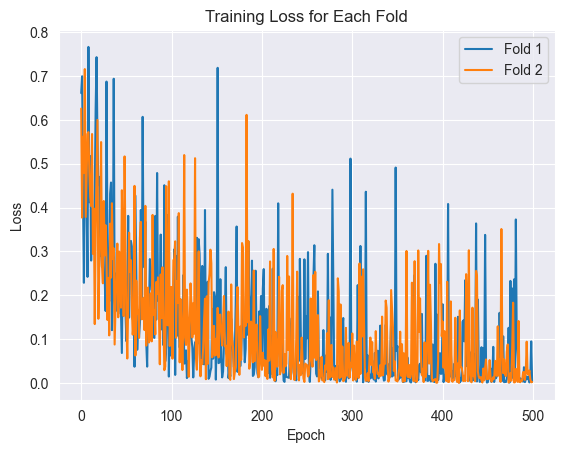

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from torchsummary import summary

# Load the dataset
df = pd.read_csv('Resources/Data/Encoded_Resampled_HR_Analytics.csv')
X = df.drop('Attrition', axis=1).values
y = df['Attrition'].values

# Data Preprocessing
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define the Neural Network model with more layers
class EnhancedNN(nn.Module):
    def __init__(self):
        super(EnhancedNN, self).__init__()
        self.fc1 = nn.Linear(34, 64)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(64, 128)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(128, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 64)
        self.fc6 = nn.Linear(64, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = self.fc6(x)
        return x

# Display model summary
model = EnhancedNN()
print("Model Summary:")
summary(model, input_size=(1, 34))

# Initialize K-Fold cross-validation
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
fold_accuracies, fold_f1s, fold_roc_aucs = [], [], []

# To store training loss for visualization
all_train_loss = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train)
    y_train_tensor = torch.LongTensor(y_train)
    X_test_tensor = torch.FloatTensor(X_test)
    y_test_tensor = torch.LongTensor(y_test)

    # Create DataLoader
    train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=32, shuffle=True)
    test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=32, shuffle=False)

    # Initialize the model, loss, and optimizer
    model = EnhancedNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0005)

    # Training the model
    train_loss = []
    for epoch in range(500):
        for batch in train_loader:
            X_batch, y_batch = batch
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
        train_loss.append(loss.item())
        print(f"Epoch {epoch+1}, Loss: {loss.item()}")

    # Add to overall training loss for visualization
    all_train_loss.append(train_loss)

    # Evaluate the model
    model.eval()
    y_pred = []
    y_true = []
    with torch.no_grad():
        for batch in test_loader:
            X_batch, y_batch = batch
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            y_pred.extend(predicted.tolist())
            y_true.extend(y_batch.tolist())

    # Calculate metrics for this fold
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)

    fold_accuracies.append(accuracy)
    fold_f1s.append(f1)
    fold_roc_aucs.append(roc_auc)

# Average metrics over all folds
print(f"Average Accuracy: {np.mean(fold_accuracies)}, Average F1 Score: {np.mean(fold_f1s)}, Average ROC AUC: {np.mean(fold_roc_aucs)}")

# Visualize the training loss
for i, train_loss in enumerate(all_train_loss):
    plt.plot(train_loss, label=f"Fold {i+1}")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss for Each Fold')
plt.legend()
plt.show()

In [13]:
from torchviz import make_dot
model = EnhancedNN()
x = torch.randn(1, 34).requires_grad_(True)
y = model(x)
dot = make_dot(y, params=dict(list(model.named_parameters()) + [('x', x)]))
dot.render(filename='model_structure', format='png', cleanup=True)

'model_structure.png'

In [14]:
torch.save(model, 'model_complete.pth')

In [16]:
import torch.onnx

dummy_input = torch.randn(1, 34)
torch.onnx.export(model, dummy_input, "model.onnx")

In [18]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import networkx as nx
from ipywidgets import interact, widgets

def plot_nn(layers):
    G = nx.DiGraph()
    for i in range(layers):
        G.add_node(f"Input_{i+1}")
        G.add_node(f"Hidden_{i+1}")
        G.add_node(f"Output_{i+1}")

        G.add_edge(f"Input_{i+1}", f"Hidden_{i+1}")
        G.add_edge(f"Hidden_{i+1}", f"Output_{i+1}")

    pos = {}
    for i, node in enumerate(G.nodes):
        x = i // 3
        y = i % 3
        pos[node] = (y, -x)  # 修改了x和y的位置，以便更好地展示图

    nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='bold', node_size=700, font_size=18)
    plt.show()

interact(plot_nn, layers=widgets.IntSlider(min=1, max=10, step=1, value=1))

interactive(children=(IntSlider(value=1, description='layers', max=10, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_nn(layers)>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from multiprocessing import Process, Manager
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 定义神经网络模型
class EnhancedNN(nn.Module):
    def __init__(self):
        super(EnhancedNN, self).__init__()
        self.fc1 = nn.Linear(31, 64)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(64, 128)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(128, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 64)
        self.fc6 = nn.Linear(64, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = self.fc6(x)
        return x

# 用于训练的函数
def train_fold(fold_data):
    train_index, test_index, X, y, results, fold, all_train_loss = fold_data
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = EnhancedNN().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # 数据转换
    X_train_tensor = torch.FloatTensor(X[train_index]).to(device)
    y_train_tensor = torch.LongTensor(y[train_index]).to(device)
    X_test_tensor = torch.FloatTensor(X[test_index]).to(device)
    y_test_tensor = torch.LongTensor(y[test_index]).to(device)

    # 创建DataLoader
    train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=32, shuffle=True)

    # 训练模型
    fold_train_loss = []
    for epoch in range(100):  # 假设我们只训练10个epoch
        epoch_loss = 0.0
        for batch in train_loader:
            X_batch, y_batch = batch
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        # 记录平均损失值
        fold_train_loss.append(epoch_loss / len(train_loader))

    # 评估模型
    model.eval()
    with torch.no_grad():
        outputs = model(X_test_tensor)
        _, predicted = torch.max(outputs, 1)
        accuracy = accuracy_score(y_test_tensor.cpu(), predicted.cpu())

    # 将结果保存到共享字典
    results[fold] = accuracy
    all_train_loss[fold] = fold_train_loss

# 主函数
def main():
    df = pd.read_csv('Resources/Data/Encoded_Resampled_HR_Analytics.csv')
    X = df.drop('Attrition', axis=1).values
    y = df['Attrition'].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    manager = Manager()
    results = manager.dict()
    all_train_loss = manager.dict()

    processes = []

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
        fold_data = (train_index, test_index, X, y, results, fold, all_train_loss)
        p = Process(target=train_fold, args=(fold_data,))
        processes.append(p)
        p.start()

    for p in processes:
        p.join()

    # 输出精度结果
    for fold, accuracy in results.items():
        print(f'Fold {fold}: Accuracy = {accuracy}')

    # 绘制损失图
    plt.figure(figsize=(10, 8))
    for fold, loss in all_train_loss.items():
        plt.plot(loss, label=f'Fold {fold+1}')
    plt.title('Training Loss for Each Fold')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

if __name__ == '__main__':
    main()